A passport office claims that the passport applications are processed within 30 days of
submitting the application form and all necessary documents. The file passport.csv contains
processing time of 40 passport applicants. The population standard deviation of the
processing time is 12.5 days. Conduct a hypothesis test at significance level a = 0.05 to verify
the claim made by the passport office.

In [4]:
import pandas as pd
passport_df = pd.read_excel('passport.xlsx')
passport_df.head(5)

,processing_time
0,16
1,34
2,28
3,21
4,16


In [5]:
print(list(passport_df.processing_time))

[16, 34, 28, 21, 16, 28, 29, 27, 30, 24, 18, 41, 37, 35, 31, 23, 25, 24, 28, 23, 22, 21, 33, 16, 19, 32, 32, 24, 35, 29, 24, 38, 27, 24, 25, 26, 32, 35, 22, 28]


In [8]:
import math
from scipy import stats
def z_test(pop_mean, pop_std, sample):
    z_score = (sample.mean() - pop_mean)/(pop_std/math.sqrt(len(sample)))
    return z_score, stats.norm.cdf(z_score)

In [9]:
z_test(30, 12.5, passport_df.processing_time)

(-1.4925950555994747, 0.06777160919961511)

#### One-Sample t-Test

The t-test is used when the population standard deviation S is unknown (and hence estimated from the
sample) and is estimated from the sample. 

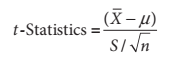

Aravind Productions (AP) is a newly formed movie production house based out of
Mumbai, India. AP was interested in understanding the production cost required for producing a Bollywood movie. The industry believes that the production house will require
INR 500 million (50 crore) on average. It is assumed that the Bollywood movie production
cost follows a normal distribution. The production costs of 40 Bollywood movies in millions of rupees are given in bollywoodmovies.csv file. Conduct an appropriate hypothesis
test at alpha = 0.05 to check whether the belief about average production cost is correct.

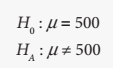

In [10]:
bollywood_movies_df = pd.read_csv('bollywoodmovies.csv')
bollywood_movies_df.head(5)

,production_cost
0,601
1,627
2,330
3,364
4,562


In [11]:
print(list(bollywood_movies_df.production_cost))

[601, 627, 330, 364, 562, 353, 583, 254, 528, 470, 125, 60, 101, 110, 60, 252, 281, 227, 484, 402, 408, 601, 593, 729, 402, 530, 708, 599, 439, 762, 292, 636, 444, 286, 636, 667, 252, 335, 457, 632]


In [12]:
stats.ttest_1samp(bollywood_movies_df.production_cost, 500)

Ttest_1sampResult(statistic=-2.284553287266754, pvalue=0.0278625564067618)

### Two-Sample t-Test

A two-sample t-test is required to test difference between two population means where standard 
deviations are unknown. The parameters are estimated from the samples

A company claims that children (in the age group between 7 and 12) who drink their
(the company’s) health drink will grow taller than the children who do not drink that health
drink. Data in the file healthdrink.xlsx shows average increase in height over one-year period
from two groups: one drinking the health drink and the other not drinking the health drink.
At a = 0.05, test whether the increase in height for the children who drink the health drink
is different than those who do not drink health drink.

In [13]:
healthdrink_yes_df = pd.read_excel('healthdrink.xlsx','healthdrink_yes')
healthdrink_yes_df.head(5)

,height_increase
0,8.6
1,5.8
2,10.2
3,8.5
4,6.8


In [14]:
healthdrink_no_df = pd.read_excel('healthdrink.xlsx','healthdrink_no') 
healthdrink_no_df.head(5)

,height_increase
0,5.3
1,9.0
2,5.7
3,5.5
4,5.4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


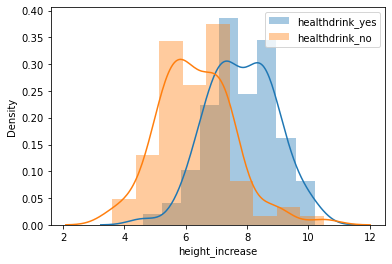

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.distplot(healthdrink_yes_df['height_increase'], label='healthdrink_yes') 
sn.distplot(healthdrink_no_df['height_increase'], label ='healthdrink_no')
plt.legend();

In [21]:
stats.ttest_ind(healthdrink_yes_df['height_increase'],
healthdrink_no_df['height_increase'])

Ttest_indResult(statistic=8.131675069083359, pvalue=1.197698592263946e-13)

The probability of the samples belonging to the same distribution is almost 0. This means
that the increase in height for those who had health drink is significantly different than those 
who did not.

### Paired Sample t-Test

The file breakups.csv contains alcohol consumption before and after breakup. Conduct a
paired t-test to check whether the alcohol consumption is more after the breakup at 95%
confidence (a = 0.05).

In [22]:
breakups_df = pd.read_csv('breakups.csv')
breakups_df.head(5)

,Before_Breakup,After_Breakup
0,470,408
1,354,439
2,496,321
3,351,437
4,349,335


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


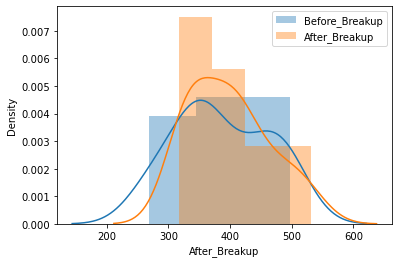

In [25]:
sn.distplot(breakups_df['Before_Breakup'], label ='Before_Breakup')
sn.distplot(breakups_df['After_Breakup'], label ='After_Breakup')
plt.legend();

In [26]:
stats.ttest_rel(breakups_df['Before_Breakup'], breakups_df['After_Breakup'])

Ttest_relResult(statistic=-0.5375404241815105, pvalue=0.5971346738292477)

As the p-value is 0.597, which is more than 0.05 value, we conclude that they are part of same
distribution. There is no change in alcohol consumption pattern before and after breakup.

### Chi-Square Goodness of Fit Test

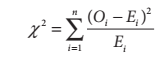

Hanuman Airlines (HA) operated daily flights to several Indian cities. One of the problems
HA faces is the food preferences by the passengers. Captain Cook, the operations manager of
HA, believes that 35% of their passengers prefer vegetarian food, 40% prefer non-vegetarian
food, 20% low calorie food, and 5% request for diabetic food. A sample of 500 passengers
was chosen to analyze the food preferences and the observed frequencies are as follows:
1. Vegetarian: 190
2. Non-vegetarian: 185
3.  Low calorie: 90
4. Diabetic: 35
Conduct a chi-square test to check whether Captain Cook’s belief is true at a = 0.05

In [28]:
## Observed frequencies
f_obs = [190, 185, 90, 35]
## Expected frequencies from the percentages expected
f_exp = [500*0.35, 500*0.4, 500*.2, 500*0.05]
print(f_exp)

[175.0, 200.0, 100.0, 25.0]


In [29]:
from scipy import stats
stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=7.410714285714286, pvalue=0.05989751420084909)